In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
clean, _ = librosa.load("p226_001_clean.wav", sr=22050, mono=True, res_type='kaiser_fast', offset=0.0, duration=None)
mixture, _ = librosa.load("p226_001_noisy.wav", sr=None)

In [14]:
clean, _ = librosa.load("p226_001_clean.wav", sr=22050, mono=True, res_type='kaiser_fast', offset=0.0, duration=None)


In [18]:
print(clean)

[-0.00246163 -0.00427949 -0.00386223 ... -0.00208215 -0.00104564
 -0.0003302 ]


In [15]:
np.split(clean, np.round(len(clean)/16384))

[array([-0.00246163, -0.00427949, -0.00386223, ...,  0.4529038 ,
         0.44196424,  0.43329743], dtype=float32),
 array([0.43187663, 0.4069173 , 0.30960315, ..., 0.1221031 , 0.10538082,
        0.07647742], dtype=float32),
 array([ 0.04053267, -0.00356441, -0.05359135, ..., -0.00208215,
        -0.00104564, -0.0003302 ], dtype=float32)]

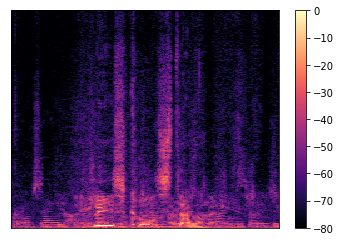

In [4]:
D = librosa.stft(mixture)  # STFT of y
S_db1 = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# return shape (1+n_fft/2, n_frames)
plt.figure()
librosa.display.specshow(S_db1)
plt.colorbar()

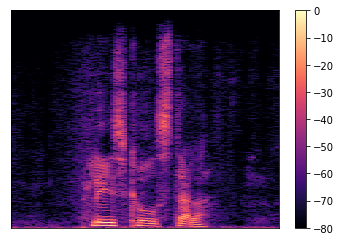

In [8]:
D = librosa.stft(clean)  # STFT of y
S_db2 = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db2)
plt.colorbar()

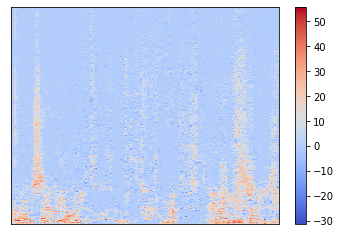

In [43]:
S_db = S_db1-S_db2
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [52]:
S_db2.shape

(1025, 214)

In [53]:
def l2_loss(x, target):
    gap = x - target
    loss = np.sum(gap**2)
    w, h = target.shape
    loss /= (w*h)
    return loss

In [55]:
def crop_loss(x, target, w1, w2):
    '''
    x, target : spectrogramed data with librosa.stft & amplitude to db
    w1 : croped freq domain weight
    w2 : other freq domain weight
    '''
    freqs, times = x.shape
    th1 = 200
    th2 = 600
    gap = x - target
    gap1 = gap[th1:th2]
    gap0 = gap[:th1]
    gap2 = gap[th2:]
    loss = w1*np.sum(gap1**2)+w2*(np.sum(gap0**2)+np.sum(gap2**2))
    # normalized need
    w, h = target.shape
    loss /= (w*h)
    return loss

In [59]:
loss1 = l2_loss(S_db1, S_db2)
loss2 = crop_loss(S_db1, S_db2, 0.7, 0.3)

print("l2 loss: ", np.round(loss1,2))
print("Croped loss: ", np.round(loss2,2)) 

l2 loss:  41.15
Croped loss:  17.26
